In [1]:
import pandas as pd 
import numpy as np
import torch
import h5py
print("PyTorch version:", torch.__version__)
import glob
import matplotlib.pyplot as plt
import tensorflow as tf

PyTorch version: 2.2.1+cu121


In [2]:
path="./archive/TrainData/img/image_30.h5"
path_mask="./archive/TrainData/mask/mask_30.h5"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ls :  ['img']
<HDF5 dataset "img": shape (128, 128, 14), type "<f8">
Shape :  (128, 128, 14)


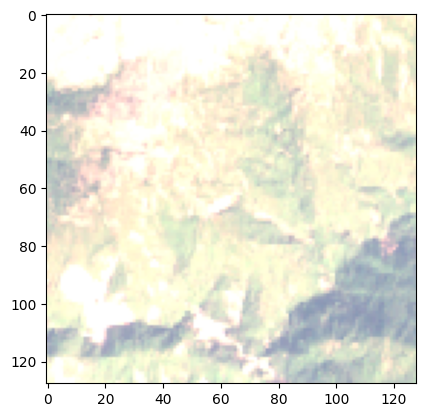

In [3]:
with h5py.File(path) as item:
    ls=list(item.keys())
    print("ls : ",ls)
    print(item.get('img'))
    data=np.array(item.get('img'))
    print("Shape : ",data.shape)
    plt.imshow(data[:,:,3:0:-1])

def ndvi(data):
    f_data=np.zeros((1,128,128,3))
    # R G B
    data_red=data[:,:,3] # 3rd one is red band
    data_green=data[:,:,2] # 2nd one is green band
    data_blue=data[:,:,1] # 1st one is blue band
    data_nir=data[:,:,7]
    data_rgb=data[:,:,3:0:-1]
    data_ndvi=np.divide(data_nir-data_red,np.add(data_nir,data_red))
    f_data[0,:,:,0]=data_ndvi
    f_data[0,:,:,1]=data[:,:,12]
    f_data[0,:,:,2]=data[:,:,13]
    print("NDVI shape: ",data_ndvi.shape,"f_data shape :",f_data.shape)
    plt.imshow(data_ndvi)

NDVI shape:  (128, 128) f_data shape : (1, 128, 128, 3)


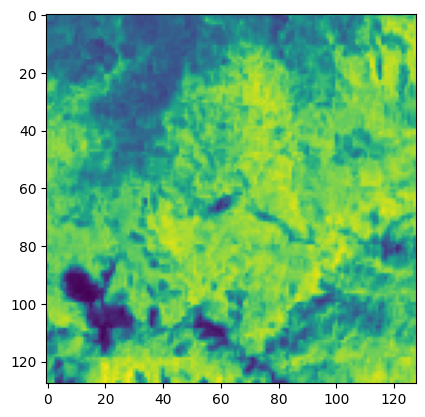

In [4]:
ndvi(data)

ls :  ['mask']
<HDF5 dataset "mask": shape (128, 128), type "|u1">
Shape :  (128, 128)


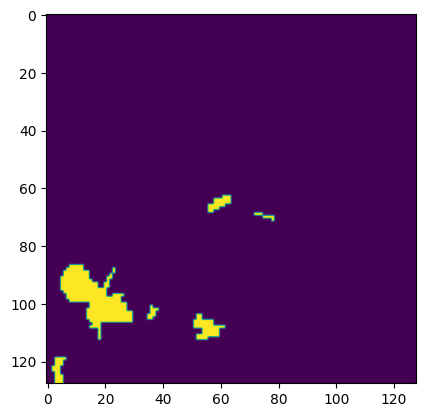

In [4]:
with h5py.File(path_mask) as item: # yellow denotes landslides 
    ls=list(item.keys())
    print("ls : ",ls)
    print(item.get('mask'))
    data2=np.array(item.get('mask'))
    print("Shape : ",data2.shape)
    plt.imshow(data2)

In [5]:
train_features="./archive/TrainData/img/*.h5"
train_labels="./archive/TrainData/mask/*.h5"
train_xx=np.zeros((3799,128,128,6)) # 3799 img and mask
train_yy=np.zeros((3799,128,128,1))

X=sorted(glob.glob(train_features))
Y=sorted(glob.glob(train_labels))

In [7]:
tf.test.gpu_device_name()

''

In [6]:
for i,(img,mask) in enumerate(zip(X,Y)):
    print(i,img,mask)
    with h5py.File(img) as input:
        ls=list(input.keys())
        data=np.array(input.get('img'))
        # assigning for nan value
        data[np.isnan(data)]=0.000001
        # normalize data
        mid_rgb=data[:,:,1:4].max()/2.0
        mid_slope=data[:,:,12].max()/2.0
        mid_elevation=data[:,:,13].max()/2.0

        # ndvi calculations
        data_red=data[:,:,3]
        data_nir=data[:,:,7]
        data_ndvi=np.divide(data_nir-data_red,np.add(data_red,data_nir))

        # adding to the final array
        train_xx[i,:,:,0]=1-data[:,:,3]/mid_rgb # red
        train_xx[i,:,:,1]=1-data[:,:,2]/mid_rgb # green
        train_xx[i,:,:,2]=1-data[:,:,1]/mid_rgb # blue
        train_xx[i,:,:,3]=data_ndvi
        train_xx[i,:,:,4]=1-data[:,:,12]/mid_slope # slope
        train_xx[i,:,:,5]=1-data[:,:,13]/mid_elevation # elevation
    with h5py.File(mask) as label:
        ls2=list(label.keys())
        data2=np.array(label.get('mask'))
        train_yy[i,:,:,0]=data2

0 ./archive/TrainData/img\image_1.h5 ./archive/TrainData/mask\mask_1.h5
1 ./archive/TrainData/img\image_10.h5 ./archive/TrainData/mask\mask_10.h5
2 ./archive/TrainData/img\image_100.h5 ./archive/TrainData/mask\mask_100.h5
3 ./archive/TrainData/img\image_1000.h5 ./archive/TrainData/mask\mask_1000.h5
4 ./archive/TrainData/img\image_1001.h5 ./archive/TrainData/mask\mask_1001.h5
5 ./archive/TrainData/img\image_1002.h5 ./archive/TrainData/mask\mask_1002.h5
6 ./archive/TrainData/img\image_1003.h5 ./archive/TrainData/mask\mask_1003.h5
7 ./archive/TrainData/img\image_1004.h5 ./archive/TrainData/mask\mask_1004.h5
8 ./archive/TrainData/img\image_1005.h5 ./archive/TrainData/mask\mask_1005.h5
9 ./archive/TrainData/img\image_1006.h5 ./archive/TrainData/mask\mask_1006.h5
10 ./archive/TrainData/img\image_1007.h5 ./archive/TrainData/mask\mask_1007.h5
11 ./archive/TrainData/img\image_1008.h5 ./archive/TrainData/mask\mask_1008.h5
12 ./archive/TrainData/img\image_1009.h5 ./archive/TrainData/mask\mask_100

C:\Users\tamal\AppData\Local\Temp\ipykernel_6784\3964723815.py:23: RuntimeWarning: invalid value encountered in divide
  train_xx[i,:,:,4]=1-data[:,:,12]/mid_slope # slope


1674 ./archive/TrainData/img\image_2505.h5 ./archive/TrainData/mask\mask_2505.h5
1675 ./archive/TrainData/img\image_2506.h5 ./archive/TrainData/mask\mask_2506.h5
1676 ./archive/TrainData/img\image_2507.h5 ./archive/TrainData/mask\mask_2507.h5
1677 ./archive/TrainData/img\image_2508.h5 ./archive/TrainData/mask\mask_2508.h5
1678 ./archive/TrainData/img\image_2509.h5 ./archive/TrainData/mask\mask_2509.h5
1679 ./archive/TrainData/img\image_251.h5 ./archive/TrainData/mask\mask_251.h5
1680 ./archive/TrainData/img\image_2510.h5 ./archive/TrainData/mask\mask_2510.h5
1681 ./archive/TrainData/img\image_2511.h5 ./archive/TrainData/mask\mask_2511.h5
1682 ./archive/TrainData/img\image_2512.h5 ./archive/TrainData/mask\mask_2512.h5
1683 ./archive/TrainData/img\image_2513.h5 ./archive/TrainData/mask\mask_2513.h5
1684 ./archive/TrainData/img\image_2514.h5 ./archive/TrainData/mask\mask_2514.h5
1685 ./archive/TrainData/img\image_2515.h5 ./archive/TrainData/mask\mask_2515.h5
1686 ./archive/TrainData/img\i

C:\Users\tamal\AppData\Local\Temp\ipykernel_6784\3964723815.py:16: RuntimeWarning: invalid value encountered in divide
  data_ndvi=np.divide(data_nir-data_red,np.add(data_red,data_nir))


2266 ./archive/TrainData/img\image_3038.h5 ./archive/TrainData/mask\mask_3038.h5
2267 ./archive/TrainData/img\image_3039.h5 ./archive/TrainData/mask\mask_3039.h5
2268 ./archive/TrainData/img\image_304.h5 ./archive/TrainData/mask\mask_304.h5
2269 ./archive/TrainData/img\image_3040.h5 ./archive/TrainData/mask\mask_3040.h5
2270 ./archive/TrainData/img\image_3041.h5 ./archive/TrainData/mask\mask_3041.h5
2271 ./archive/TrainData/img\image_3042.h5 ./archive/TrainData/mask\mask_3042.h5
2272 ./archive/TrainData/img\image_3043.h5 ./archive/TrainData/mask\mask_3043.h5
2273 ./archive/TrainData/img\image_3044.h5 ./archive/TrainData/mask\mask_3044.h5
2274 ./archive/TrainData/img\image_3045.h5 ./archive/TrainData/mask\mask_3045.h5
2275 ./archive/TrainData/img\image_3046.h5 ./archive/TrainData/mask\mask_3046.h5
2276 ./archive/TrainData/img\image_3047.h5 ./archive/TrainData/mask\mask_3047.h5
2277 ./archive/TrainData/img\image_3048.h5 ./archive/TrainData/mask\mask_3048.h5
2278 ./archive/TrainData/img\i

In [7]:
train_xx[np.isnan(train_xx)]=0.000001
print(train_xx.min(),train_xx.max(),train_yy.min(),train_yy.max())

-1.0 1.0 0.0 1.0


In [10]:
def dice_loss(y_true,y_pred): # dice loss function
    y_true=tf.cast(y_true,tf.float32)
    y_pred=tf.math.sigmoid(y_pred)
    numerator=2*tf.reduce_sum(y_true*y_pred)
    denominator=tf.reduce_sum(y_true*y_pred)

    return 1- numerator/denominator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


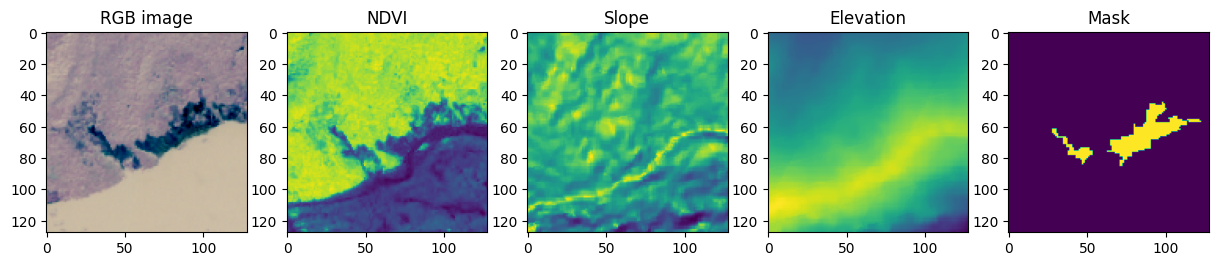

In [8]:
# visualization of training data
img=232
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(15,10))
ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(train_xx[img,:,:,0:3]) # RGB image
ax2.imshow(train_xx[img,:,:,3]) # NDVI
ax3.imshow(train_xx[img,:,:,4]) # Slope
ax4.imshow(train_xx[img,:,:,5]) # Elevation
ax5.imshow(train_yy[img,:,:,0]) # Mask

In [9]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(train_xx,train_yy,test_size=0.2)

In [13]:
len(x_train)

3039

In [14]:

def m_recall(y_true,y_pred): 
    true_positive=K.sum(K.round(K.clip(y_true*y_pred,0,1)))   
    possible_positive=K.sum(K.round(K.clip(y_true,0,1)))
    my_reccall=true_positive/(possible_positive+K.epsilon())
    return my_reccall
def m_precision(y_true,y_pred):
    true_positive=K.sum(K.round(K.clip(y_true*y_pred,0,1)))
    predicted_positive=K.sum(K.round(K.clip(y_pred,0,1)))
    precision_=true_positive/(predicted_positive+K.epsilon())
def m_f1_score(y_true,y_pred):
    precision_=precision(y_true,y_pred)
    recall_=recall(y_true,y_pred)
    return 2*precision_ *recall_/(precision_+recall_+K.epsilon())

In [15]:
# tf.keras.backend.epsilon() = e^-7 used to avoid x/0 errors
print(tf.keras.backend.epsilon())
from sklearn.metrics import precision_score, recall_score

# Define precision and recall functions using instantiated metrics objects
true_positives_metric = tf.keras.metrics.TruePositives()
false_positives_metric = tf.keras.metrics.FalsePositives()
false_negatives_metric = tf.keras.metrics.FalseNegatives()

def precision(y_true, y_pred): #Of all the instances predicted as positive, how many were actually positive?
    true_positives = true_positives_metric(y_true, y_pred) # pred=+ve & pred=True
    false_positives = false_positives_metric(y_true, y_pred)# pred=+ve & pred=False
    return true_positives / (true_positives + false_positives + tf.keras.backend.epsilon())

def recall(y_true, y_pred):# sensitivity / Of all the actual positive instances, how many did the model correctly identify?
    true_positives = true_positives_metric(y_true, y_pred) # pred=+ve & pred=True
    false_negatives = false_negatives_metric(y_true, y_pred)# pred=-ve & pred=False # missing positive instances 
    return true_positives / (true_positives + false_negatives + tf.keras.backend.epsilon())

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * prec * rec / (prec + rec + tf.keras.backend.epsilon())


# def precision(y_true, y_pred): #Of all the instances predicted as positive, how many were actually positive?
#     true_positives = true_positives_metric()(y_true, y_pred) # pred=+ve & pred=True
#     false_positives = false_positives_metric()(y_true, y_pred)# pred=+ve & pred=False
#     return true_positives / (true_positives + false_positives + tf.keras.backend.epsilon())

# def recall(y_true, y_pred): # sensitivity / Of all the actual positive instances, how many did the model correctly identify?
#     true_positives = true_positives_metric()(y_true, y_pred) # pred=+ve & pred=True 
#     false_negatives = false_negatives_metric()(y_true, y_pred)# pred=-ve & pred=False
#     # missing positive instances 
#     return true_positives / (true_positives + false_negatives + tf.keras.backend.epsilon())
# def f1_score(y_true, y_pred):# By taking the harmonic mean, the F1 score gives more weight to lower values. This means that the F1 score will be high only if both precision and recall are high.
#     prec,rec=precision(y_true, y_pred),recall(y_true, y_pred)
#     return 2*prec*rec/(prec+rec+tf.keras.backend.epsilon())

1e-07


In [95]:
old=0.001 # default learning rate
reduce=0.05
number=160
my_th=80
new=old*(1-reduce)**(number-my_th)
print(f"Total epoch :{number}\nThreshold :{my_th}\nReducing by {reduce*100} % after threshold\nAdams default learning rate was :",old,f"\nNew learning rate at {number}th epoch:","{:.10f}".format(new))

Total epoch :160
Threshold :80
Reducing by 5.0 % after threshold
Adams default learning rate was : 0.001 
New learning rate at 160th epoch: 0.0000165154


In [17]:
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score, precision, recall])
    
    return model
# var_loss min_delta=0.001 f1_score=0.81
model = unet_model(128, 128, 6)
# model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("model_epoch_160_valf1m0_0001.keras", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")

def scheduler(epoch, lr):
    if epoch < 80: # loss and F1 score starts to plateau near 80-100
        return lr
    else:
        return float(lr * tf.math.exp(-0.05)) # reducing learning rate by 5%
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_f1_m',  # Metric to monitor / val_loss
    patience=20,          # Number of epochs with no improvement after which training will be stopped
    verbose=1,            # Verbosity mode. 0: silent, 1: progress bar, 2: one line per epoch
    mode='auto',          # Direction of improvement to monitor. 'auto', 'min', 'max'
    min_delta=0.0001,          # Minimum change in the monitored quantity to qualify as improvement
    baseline=None,        # Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline
    restore_best_weights=False  # Whether to restore model weights from the epoch with the best value of the monitored quantity
)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)    
callbacks = [
    # earlyStopping,
    checkpointer,
    early_stopping,
    lr_scheduler
    ]
y_train_reshaped = np.squeeze(y_train, axis=-1) 
# data = 3039 batch=32  step = (data/batch) =95
history = model.fit(x_train, y_train_reshaped, batch_size=32,   # each image is almost 2 MB
          epochs=160, 
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model.save("model_epoch_160_valf1m0_0001.h5")


Epoch 1/160
95/95 - 130s - 1s/step - accuracy: 0.9709 - f1_score: 0.0302 - loss: 0.0925 - precision: 0.0385 - recall: 0.0439 - val_accuracy: 0.9782 - val_f1_score: 0.0206 - val_loss: 0.0475 - val_precision: 0.0556 - val_recall: 0.0127 - learning_rate: 0.0010
Epoch 2/160


c:\Users\tamal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_f1_m available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
c:\Users\tamal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_f1_m` which is not available. Available metrics are: accuracy,f1_score,loss,precision,recall,val_accuracy,val_f1_score,val_loss,val_precision,val_recall
  current = self.get_monitor_value(logs)


95/95 - 174s - 2s/step - accuracy: 0.9815 - f1_score: 0.1699 - loss: 0.0465 - precision: 0.3658 - recall: 0.1137 - val_accuracy: 0.9850 - val_f1_score: 0.4154 - val_loss: 0.0395 - val_precision: 0.6724 - val_recall: 0.3020 - learning_rate: 0.0010
Epoch 3/160
95/95 - 168s - 2s/step - accuracy: 0.9852 - f1_score: 0.5231 - loss: 0.0395 - precision: 0.7374 - recall: 0.4069 - val_accuracy: 0.9852 - val_f1_score: 0.5897 - val_loss: 0.0377 - val_precision: 0.7706 - val_recall: 0.4782 - learning_rate: 0.0010
Epoch 4/160
95/95 - 165s - 2s/step - accuracy: 0.9857 - f1_score: 0.6262 - loss: 0.0375 - precision: 0.7877 - recall: 0.5201 - val_accuracy: 0.9860 - val_f1_score: 0.6533 - val_loss: 0.0352 - val_precision: 0.8018 - val_recall: 0.5514 - learning_rate: 0.0010
Epoch 5/160
95/95 - 161s - 2s/step - accuracy: 0.9858 - f1_score: 0.6712 - loss: 0.0373 - precision: 0.8114 - recall: 0.5726 - val_accuracy: 0.9863 - val_f1_score: 0.6850 - val_loss: 0.0349 - val_precision: 0.8193 - val_recall: 0.5886 

In [18]:
x_train.shape,y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [19]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.05119660496711731 0.9879786372184753 0.8905442357063293 0.9180498719215393 0.864636242389679


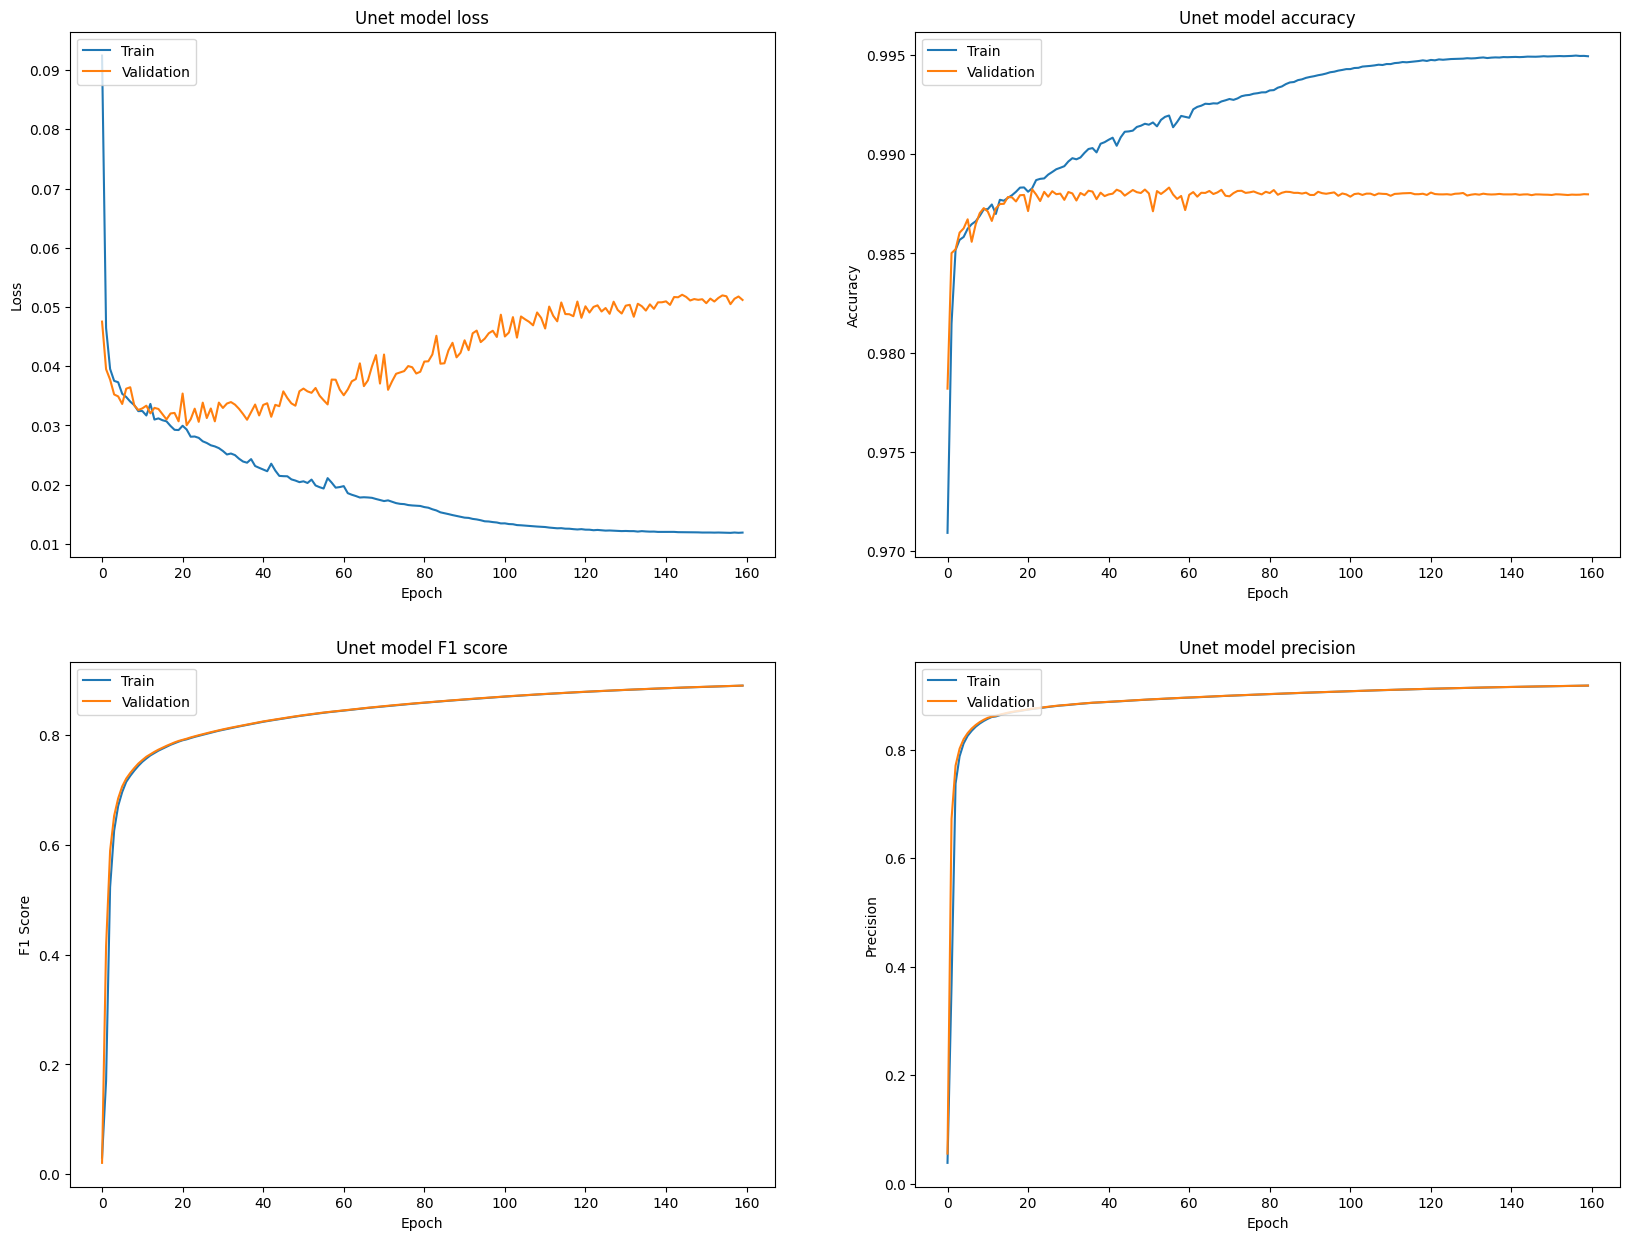

In [20]:
fig, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, figsize=(20, 15))

ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.set_title('Unet model loss')
ax11.set_ylabel('Loss')
ax11.set_xlabel('Epoch')
ax11.legend(['Train', 'Validation'], loc='upper left')

ax12.plot(history.history['accuracy'])
ax12.plot(history.history['val_accuracy'])
ax12.set_title('Unet model accuracy')
ax12.set_ylabel('Accuracy')
ax12.set_xlabel('Epoch')
ax12.legend(['Train', 'Validation'], loc='upper left')

ax13.plot(history.history['f1_score'])
ax13.plot(history.history['val_f1_score'])
ax13.set_title('Unet model F1 score')
ax13.set_ylabel('F1 Score')
ax13.set_xlabel('Epoch')
ax13.legend(['Train', 'Validation'], loc='upper left')

ax14.plot(history.history['precision'])
ax14.plot(history.history['val_precision'])
ax14.set_title('Unet model precision')
ax14.set_ylabel('Precision')
ax14.set_xlabel('Epoch')
ax14.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [10]:
model100 = tf.keras.models.load_model("./result/model_save_100_84%.h5")

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step


Text(0.5, 1.0, 'Training Image')

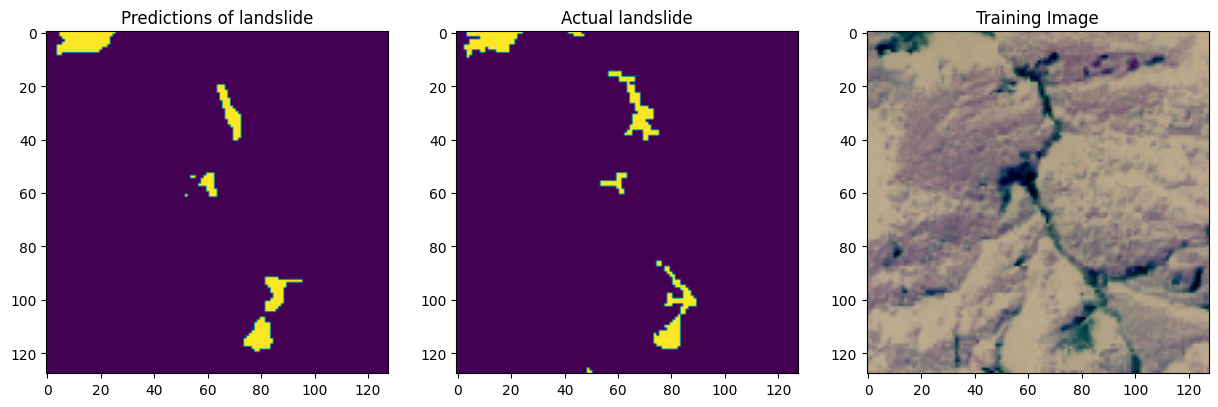

In [13]:
threshold = 0.5
pred_img = model100.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)
# print(pred_img)

img = 176
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions of landslide")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Actual landslide")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step


Text(0.5, 1.0, 'Land slide possibility >40%')

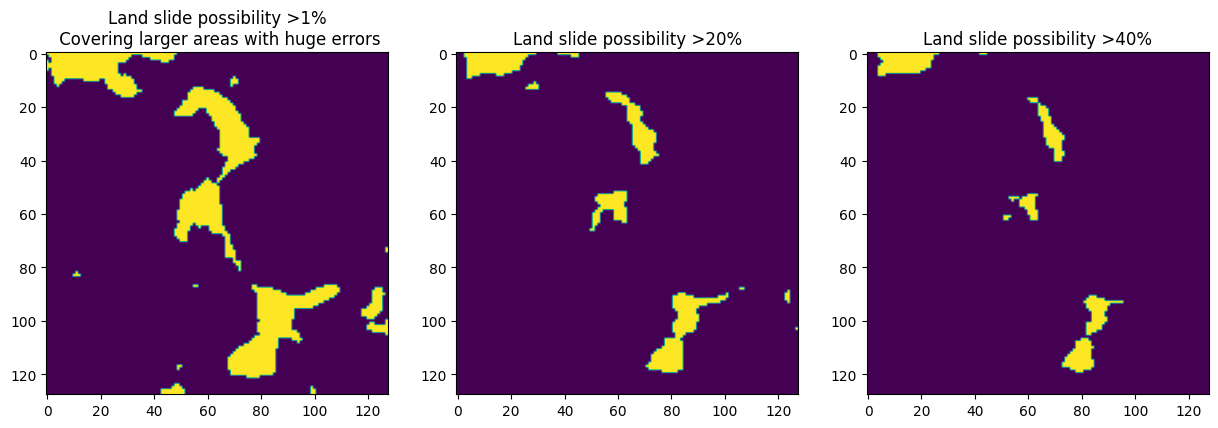

In [16]:
pred_img = model100.predict(x_valid)
pred_img_0 = (pred_img > 0.01).astype(np.uint8)

fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img_0[img, :, :, 0])
ax1.set_title("Land slide possibility >1%\n Covering larger areas with huge errors")

pred_img_25 = (pred_img > 0.2).astype(np.uint8)
ax2.imshow(pred_img_25[img, :, :, 0])
ax2.set_title("Land slide possibility >20%")

pred_img_40 = (pred_img > 0.4).astype(np.uint8)
ax3.imshow(pred_img_40[img, :, :, 0])
ax3.set_title("Land slide possibility >40%")

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step


Text(0.5, 1.0, 'Land slide possibility >99%\n Covering smaller areas with tiny errors')

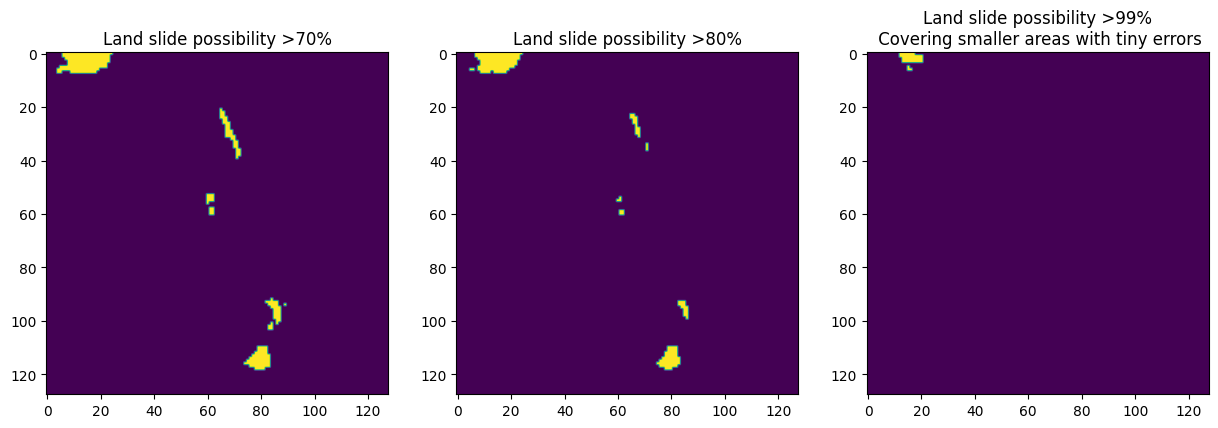

In [18]:
pred_img2 = model100.predict(x_valid)
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))

pred_img_70 = (pred_img2 > 0.7).astype(np.uint8)
ax1.imshow(pred_img_70[img, :, :, 0])
ax1.set_title("Land slide possibility >70%")

pred_img_80 = (pred_img2 > 0.8).astype(np.uint8)
ax2.imshow(pred_img_80[img, :, :, 0])
ax2.set_title("Land slide possibility >80%")

pred_img_90 = (pred_img2 > 0.99).astype(np.uint8)
ax3.imshow(pred_img_90[img, :, :, 0])
ax3.set_title("Land slide possibility >99%\n Covering smaller areas with tiny errors")


In [27]:
# validation
validation_url = './archive/ValidData/img/*.h5'
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

0 ./archive/ValidData/img\image_1.h5
1 ./archive/ValidData/img\image_10.h5
2 ./archive/ValidData/img\image_100.h5
3 ./archive/ValidData/img\image_101.h5
4 ./archive/ValidData/img\image_102.h5
5 ./archive/ValidData/img\image_103.h5
6 ./archive/ValidData/img\image_104.h5
7 ./archive/ValidData/img\image_105.h5
8 ./archive/ValidData/img\image_106.h5
9 ./archive/ValidData/img\image_107.h5
10 ./archive/ValidData/img\image_108.h5
11 ./archive/ValidData/img\image_109.h5
12 ./archive/ValidData/img\image_11.h5
13 ./archive/ValidData/img\image_110.h5
14 ./archive/ValidData/img\image_111.h5
15 ./archive/ValidData/img\image_112.h5
16 ./archive/ValidData/img\image_113.h5
17 ./archive/ValidData/img\image_114.h5
18 ./archive/ValidData/img\image_115.h5
19 ./archive/ValidData/img\image_116.h5
20 ./archive/ValidData/img\image_117.h5
21 ./archive/ValidData/img\image_118.h5
22 ./archive/ValidData/img\image_119.h5
23 ./archive/ValidData/img\image_12.h5
24 ./archive/ValidData/img\image_120.h5
25 ./archive/Va

C:\Users\tamal\AppData\Local\Temp\ipykernel_8500\1037992249.py:25: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


227 ./archive/ValidData/img\image_83.h5
228 ./archive/ValidData/img\image_84.h5
229 ./archive/ValidData/img\image_85.h5
230 ./archive/ValidData/img\image_86.h5
231 ./archive/ValidData/img\image_87.h5
232 ./archive/ValidData/img\image_88.h5
233 ./archive/ValidData/img\image_89.h5
234 ./archive/ValidData/img\image_9.h5
235 ./archive/ValidData/img\image_90.h5
236 ./archive/ValidData/img\image_91.h5
237 ./archive/ValidData/img\image_92.h5
238 ./archive/ValidData/img\image_93.h5
239 ./archive/ValidData/img\image_94.h5
240 ./archive/ValidData/img\image_95.h5
241 ./archive/ValidData/img\image_96.h5
242 ./archive/ValidData/img\image_97.h5
243 ./archive/ValidData/img\image_98.h5
244 ./archive/ValidData/img\image_99.h5


In [33]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


(245, 128, 128, 1)

Text(0.5, 1.0, 'Training Image')

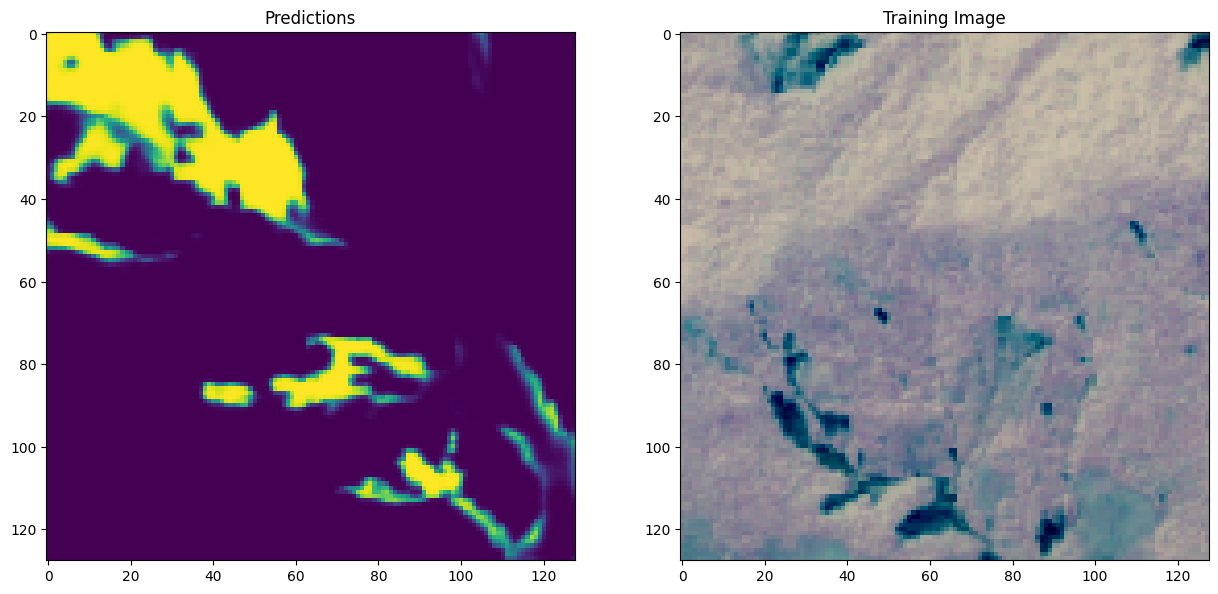

In [96]:
img = 167
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')

In [35]:
write_directory = './res160'
for i, name in enumerate(mask_name):
  name=name[4:]
  # print(name)
  h5f = h5py.File(write_directory + "/" + name, 'w')
  # change the dimention of prediction to (n, 128, 128)
  pred_mask = pred_img[i, :, :, 0]

  # write to the directory
  h5f.create_dataset('mask', data = pred_mask)
  h5f.close()